# ZPK tools

There are several helper functions available in scipy signal for workign with pole-zero filter representations.

This notebook has some basic examples of usage

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.signal import freqz_zpk
from scipy.signal import freqs_zpk

def half_frequency_axis(n_samples, sampling_rate):
    """returns the dc and positive frequncies only.  
    needs to be checked for behaviour in cases of odd vs even numbers of samples"""
    f = np.fft.fftfreq(n_samples, d=1./f_s)
    #print(n_samples/2)
    f = f[0:int(n_samples/2)] #restrict to the positive frequencies
    #print(f[0], f[-1])
    return f
    
    

## Definitions

frequency _f_ has units of $s^{-1}$

angular frequency $\omega$ is given by

$
\displaystyle   \omega = \frac{2\pi}{T} = 2\pi f \tag{ 1}
$

and has units of [rad/s].  Now we can count cycles in radians rather than time in seconds to keep track of periods.



## Units used by scipy.signal.freqz

The frequency axis is in angular frequency, and by default normalized by the data sampling rate $\it{f}_s$

Recall that $\it{f}_s$ = 2*$\it{f}_{N}$

Where $\it{f}_{N}$ denotes the Nyquist frequency, which is the higest frequency at which we can evaluate  spectral properties of a time series sampled at $\it{f}_s$.


Thus we have a default axis $\omega_{scipy}$ such that

$
\displaystyle   \omega_{scipy} = \frac{2\pi f}{2 f_{Nyq}} = \frac{\pi f}{f_{N}} \tag{2}
$


This maps zero to zero, but the nyquist frequency to $\pi$.   Scipy's default behaviour is to evaluate the frequency response at 512 frequencies, normalized to lie between 0 and $\pi$

So to obtain normal frequencies in Hz, we need to multiply the $\omega$ axis by $f_{N}$, and divide by $\pi$


In [2]:
## Initialize a very simole case

In [3]:
ZPK_EXAMPLES = {}
#/home/kkappler/.local/lib/python3.6/site-packages/scipy/signal/filter_design.py
#look at tf2zpk() and 
#/home/kkappler/.local/lib/python3.6/site-packages/scipy/signal/ltisys.py
#ZerosPolesGain #l868
#/home/kkappler/.local/lib/python3.6/site-packages/scipy/signal/filter_design.py
zeros = [[],]
poles = [[],]
gains = [1.0, 10.0, 10 + 1.j*30.0]
w1, h1 = freqz_zpk(zeros[0],poles[0],gains[0])
w2, h2 = freqz_zpk(zeros[0],poles[0],gains[1])
w3, h3 = freqz_zpk(zeros[0],poles[0],gains[2])
#wi is the angular frequency expressed in radians

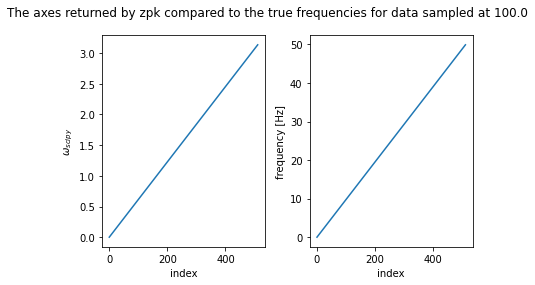

In [4]:
#plt.plot(w, np.abs(h))
#assume a sampling rate of 100Hz
f_s = 100.0
f_N = f_s/2
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].plot(w1)
ax[0].set_xlabel('index')
ax[0].set_ylabel('$\omega_{scipy}$')
ax[1].plot(w1*f_N/np.pi)
ax[1].set_xlabel('index')
ax[1].set_ylabel('frequency [Hz]')
fig.suptitle('The axes returned by zpk compared to the true frequencies for data sampled at {}'.format(f_s))
fig.tight_layout()

## A super simple example

/home/kkappler/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/kkappler/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


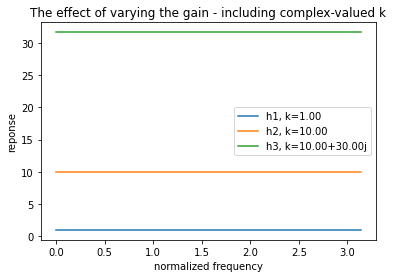

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax = [ax,]
ax[0].plot(w1, h1, label='h1, k={:.2f}'.format(gains[0]))
ax[0].plot(w2, h2, label='h2, k={:.2f}'.format(gains[1]))
ax[0].plot(w3, np.abs(h3), label='h3, k={:.2f}'.format(gains[2]))
ax[0].set_xlabel('normalized frequency')
ax[0].set_ylabel('reponse')
ax[0].set_title('The effect of varying the gain - including complex-valued k')
ax[0].legend()

# ax[1].plot(w2, h2)
# ax[1].set_xlabel('normalized frequency')
# ax[1].set_ylabel('reponse')
# ax[2].plot(w3, np.abs(h3))
# ax[2].set_xlabel('normalized frequency')
# ax[2].set_ylabel('reponse')

# ax[1].plot(w*f_N/np.pi)
# ax[1].set_xlabel('index')
# ax[1].set_ylabel('frequency [Hz]')
# fig.suptitle('The axes returned by zpk compared to the true frequencies for data sampled at {}'.format(f_s))
# fig.tight_layout()

# zpk_freqz vs zpk_freqs

These functions are very similar.  zpk_frqz uses a z-transform and is for digital filters, whereas spk_freqs uses the Laplace transform and is for analog filters.

In our problem we 

It is not 100% clear to me which we should actually use because we are working with digital data but the intrument is an analog filter ... Let's take a look at the actual differences in these functions

In [7]:
zeros = []
poles = []
gains = [1.0, 10.0, 10 + 1.j*30.0]
zw1, zh1 = freqz_zpk(zeros,poles,gains[0])
sw1, sh1 = freqs_zpk(zeros,poles,gains[0])

#we cannot difference the default outputs becuase freqz 
#evaluates at 512 frequecies by default whereas freqs evaluates at 200

zw1-sw1


ValueError: operands could not be broadcast together with shapes (512,) (200,) 

In [8]:
#So let's feed it some frequencies
#Sticking with our 100Hz example, for a timeseries with say n_samples points we have
n_samples = 1024
f = half_frequency_axis(n_samples, f_s)
# len(f)
# print(n_samples/2)
# f = f[0:int(n_samples/2)] #restrict to the positive frequencies
# print(f[0], f[-1])

w = 2*np.pi*f


zw1, zh1 = freqz_zpk(zeros,poles,gains[0], worN=w)
sw1, sh1 = freqs_zpk(zeros,poles,gains[0], worN=w)

print(np.isclose(zw1-sw1, 0).all())
#ok, so the functions evaluate identically, now lets make some non-trivial examples

True


[1611.7315706    0.           0.           0.           0.       ]
[1.00000000e+00 8.57530241e+00 1.57767906e+02 7.98628595e+02
 4.76375068e+03 7.98628595e+03 1.57767906e+04 8.57530241e+03
 1.00000000e+04]
zpk [0.+0.j 0.+0.j 0.+0.j 0.+0.j] [-0.11589175-1.00161065j -0.70428381-1.5905508j  -0.70428381+1.5905508j
 -0.11589175+1.00161065j -1.13993221+9.85202313j -2.32754343+5.25651168j
 -2.32754343-5.25651168j -1.13993221-9.85202313j] 1611.7315705964677
[ 1.+0.j  1.+0.j  1.+0.j  1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j] [0.9907366 -0.06242654j 0.95125266-0.0955309j  0.95125266+0.0955309j
 0.9907366 +0.06242654j 0.76046961+0.54325064j 0.81313017+0.28571474j
 0.81313017-0.28571474j 0.76046961-0.54325064j] 0.0012327294153368117


/home/kkappler/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
/home/kkappler/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10


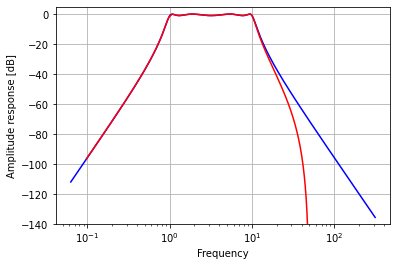

array([-0.11589175-1.00161065j, -0.70428381-1.5905508j ,
       -0.70428381+1.5905508j , -0.11589175+1.00161065j,
       -1.13993221+9.85202313j, -2.32754343+5.25651168j,
       -2.32754343-5.25651168j, -1.13993221-9.85202313j])

In [9]:
from scipy.signal import iirfilter
from scipy.signal import bilinear_zpk
#this filter from
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqs_zpk.html#scipy.signal.freqs_zpk
# not sure how it is we get 8 poles back from a 4th order filter...
z, p, k = iirfilter(4, [1, 10], 1, 60, analog=True, ftype='cheby1',
                    output='zpk')
b,a = iirfilter(4, [1, 10], 1, 60, analog=True, ftype='cheby1',
                    output='ba')
print(b)
print(a)
print('zpk',z,p,k)
fs = 100.0
zz, pp, kk = iirfilter(4, [1, 10], 1, 60, analog=False, 
                       fs=fs,  ftype='cheby1', output='zpk')
w = 2*np.pi*half_frequency_axis(10000, fs)
#zz, pp, kk = bilinear_zpk(z, p, k, fs=2*fs)
print(zz,pp,kk)
#this is an analog filter response.  If we want to convert it to a digital response we 
#need to apply the bilinear transform
w, h = freqs_zpk(z, p, k, worN=w)#np.logspace(-1, 2, 1000))
#ww, hh = freqz_zpk(z, p, k, worN=np.logspace(-1, 2, 1000))
ww, hh = freqz_zpk(zz, pp, kk, fs=100)#, worN=w)#np.logspace(-1, 2, 1000))
plt.semilogx(w, 20 * np.log10(abs(h)), 'b')
plt.semilogx(ww, 20 * np.log10(abs(hh)), 'r')
plt.xlabel('Frequency')
plt.ylabel('Amplitude response [dB]')
plt.ylim(-140,5)
plt.grid()
plt.show()
p

In [10]:

#run the example from the scipy docs using iirfilter

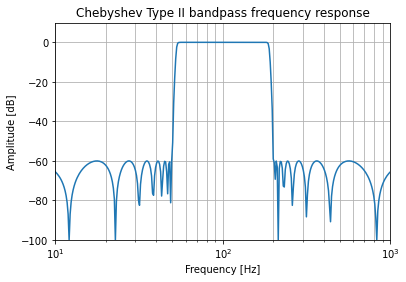

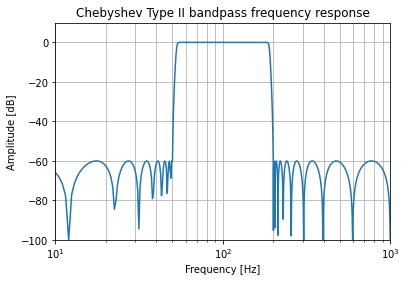

In [11]:
#Generate a 17th-order Chebyshev II analog bandpass filter from 50 Hz to
#    200 Hz and plot the frequency response:

from scipy import signal
import matplotlib.pyplot as plt

b, a = signal.iirfilter(17, [2*np.pi*50, 2*np.pi*200], rs=60,
                        btype='band', analog=True, ftype='cheby2')
w, h = signal.freqs(b, a, 1000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w / (2*np.pi), 20 * np.log10(np.maximum(abs(h), 1e-5)))
ax.set_title('Chebyshev Type II bandpass frequency response')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')
plt.show()

#    Create a digital filter with the same properties, in a system with
#    sampling rate of 2000 Hz, and plot the frequency response. (Second-order
#    sections implementation is required to ensure stability of a filter of
#    this order):

sos = signal.iirfilter(17, [50, 200], rs=60, btype='band',
                       analog=False, ftype='cheby2', fs=2000,
                       output='sos')
w, h = signal.sosfreqz(sos, 2000, fs=2000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w, 20 * np.log10(np.maximum(abs(h), 1e-5)))
ax.set_title('Chebyshev Type II bandpass frequency response')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')
plt.show()

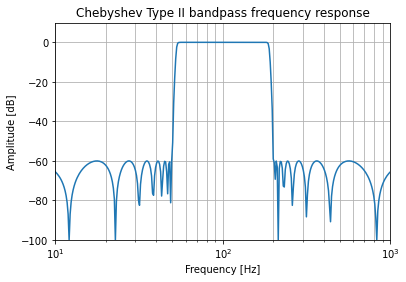

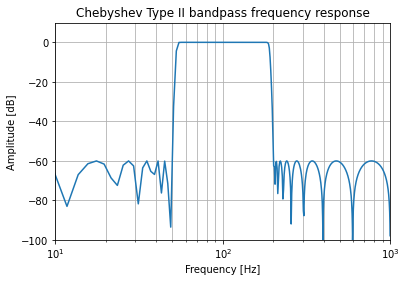

In [12]:
#Generate a 17th-order Chebyshev II analog bandpass filter from 50 Hz to
#    200 Hz and plot the frequency response:

from scipy import signal
import matplotlib.pyplot as plt

z, p, k = signal.iirfilter(17, [2*np.pi*50, 2*np.pi*200], rs=60,
                        btype='band', analog=True, ftype='cheby2', output='zpk')
w, h = signal.freqs_zpk(z,p, k, 1000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w / (2*np.pi), 20 * np.log10(np.maximum(abs(h), 1e-5)))
ax.set_title('Chebyshev Type II bandpass frequency response')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')
plt.show()

#    Create a digital filter with the same properties, in a system with
#    sampling rate of 2000 Hz, and plot the frequency response. (Second-order
#    sections implementation is required to ensure stability of a filter of
#    this order):

zz, pp, kk = signal.iirfilter(17, [50, 200], rs=60, btype='band',
                       analog=False, ftype='cheby2', fs=2000,
                       output='zpk')
w, h = signal.freqz_zpk(zz, pp, kk,fs=2000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w, 20 * np.log10(np.maximum(abs(h), 1e-5)))
ax.set_title('Chebyshev Type II bandpass frequency response')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')
plt.show()

In [13]:
zw1-sw1
zw2, zh2 = freqz_zpk(zeros,poles,gains[1])
zw3, zh3 = freqz_zpk(zeros,poles,gains[2])
sw1, sh1 = freqs_zpk(zeros,poles,gains[0])
sw2, sh2 = freqs_zpk(zeros,poles,gains[1])
sw3, sh3 = freqs_zpk(zeros,poles,gains[2])
